In [1]:
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig

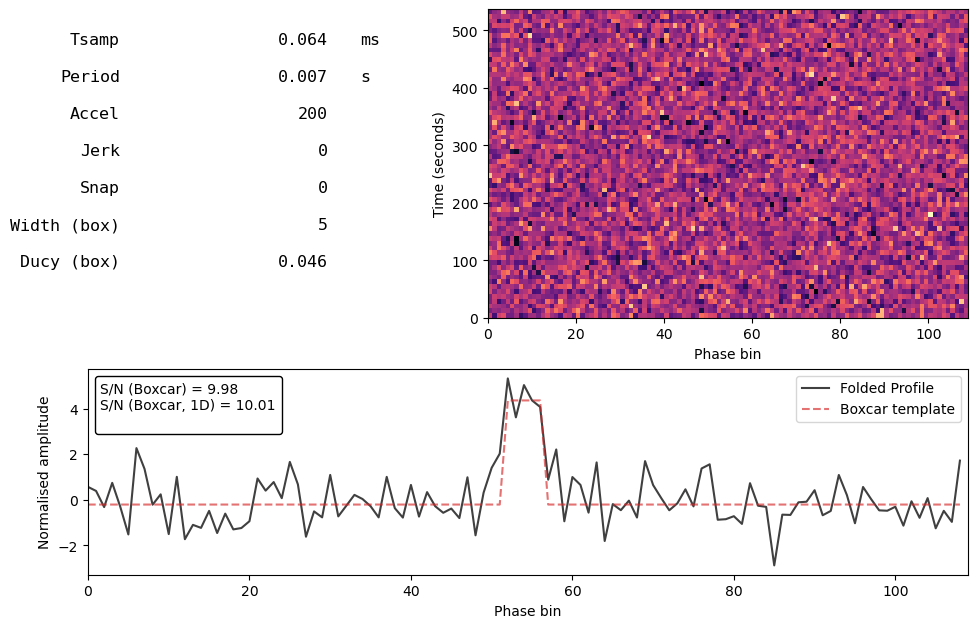

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 200
nsamps = 2**23
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 2 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins_ideal
p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 10, accel * 10), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 256
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp, pgram = ffa_search(tim_data, search_cfg)

Param limits: [(np.float64(-2000.0), np.float64(2000.0)), (np.float64(142.60131305714359), np.float64(143.11297265714214))]


2025-06-12 11:11:40 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [1.19075357e+05 2.98023224e-02]

2025-06-12 11:11:41 INFO     - pyloki.ffa - ffa level:  0, leaves: 4.09, fold dims: (256, 1, 17, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.155 seconds

Output()

2025-06-12 11:11:44 INFO     - pyloki.ffa - ffa level:  1, leaves:  5.09, fold dims: (128, 1, 34, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  6.09, fold dims: (64, 1, 68, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  8.10, fold dims: (32, 2, 137, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  4, leaves: 11.10, fold dims: (16, 8, 274, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  5, leaves: 14.19, fold dims: (8, 34, 549, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  6, leaves: 17.20, fold dims: (4, 137, 1098, 2, 33)

2025-06-12 11:11:46 INFO     - pyloki.ffa - ffa level:  7, leaves: 20.20, fold dims: (2, 550, 2197, 2, 33)

2025-06-12 11:11:55 INFO     - pyloki.ffa - ffa level:  8, leaves: 23.21, fold dims: (1, 2201, 4395, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [1.81694575e+00 1.16415322e-04]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 14.603 seconds

                    INFO     - pyloki.ffa - Using FFT for phase shifts: Inverse FFTing the fold

                    INFO     - pyloki.ffa - Fold shape: (1, 2201, 4395, 2, 33)

In [4]:
print(pgram.get_indices_summary(true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (1210, 2197)
Best param indices: (np.int64(1210), np.int64(2197), np.int64(4))
Best S/N: 9.63
Best Period: 0.007
Best accel: 199.8183469573115
Best freq: 142.85714285714286
Best width: 6


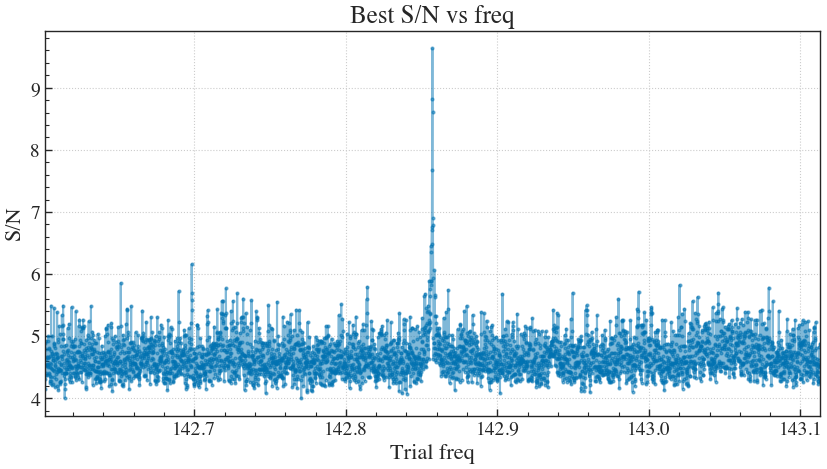

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

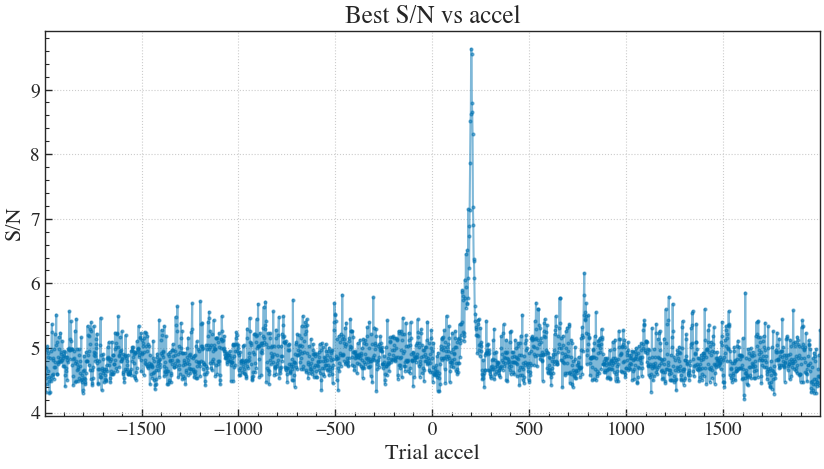

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

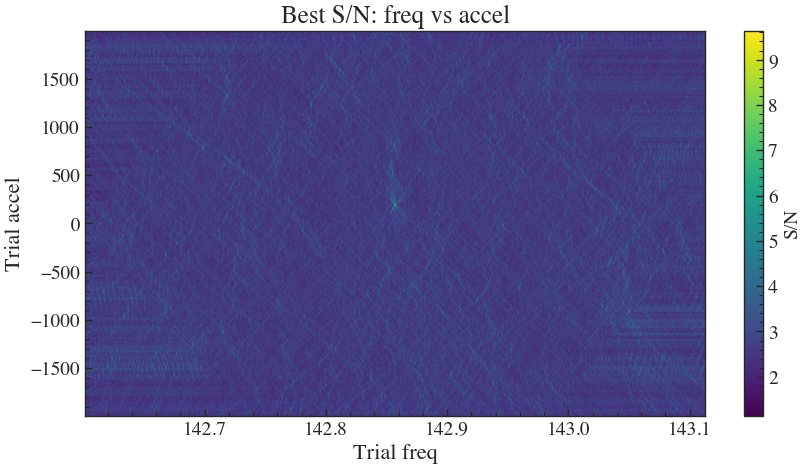

In [7]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()